In [424]:
import os
import glob
import pandas as pd

In [425]:
### Finding literacy data

In [426]:
def get_literacy():
    df_literacy = pd.read_csv('literacy.csv')
    df_literacy.set_index(['Country Name', 'Country Code'], inplace=True)
    df_literacy.columns = df_literacy.columns.str.extract(r'\[(.*?)\]', expand=False)  # Extract years from column names
    df_literacy = df_literacy.stack().reset_index(name='Literacy Rate')
    df_literacy['Year'] = df_literacy['level_2'].str.extract(r'(\d+)', expand=False).astype(int)
    df_literacy.drop('level_2', axis=1, inplace=True)
    df_literacy.sort_values(by=['Country Name', 'Year'], inplace=True)
    df_literacy.rename(columns={'Country Name': 'Entity', 'Country Code': 'Code'}, inplace=True)
    df_literacy.to_csv('literacy_data.csv', index=False)

## Data Pre Processing

In [459]:
csv_files_names = ["average-years-of-schooling.csv", "cereal-yield.csv",
                   "child-mortality-igme.csv", "completion-rate-of-upper-secondary-education-sdg.csv", 
                   "daily-mean-income.csv", 
                   "death-rate-from-air-pollution-per-100000.csv", "death-rates-from-drug-use-disorders.csv", 
                   "gender-inequality-index-from-the-human-development-report.csv", 
                   "global-vaccination-coverage.csv", "happiness-cantril-ladder.csv", 
                   "human-development-index.csv", 
                   "life-expectancy-hmd-unwpp.csv", "national-gdp-wb.csv", 
                   "patent-applications-per-million.csv", "political-corruption-index.csv", 
                   "primary-secondary-enrollment-completion-rates.csv", 
                   "researchers-in-rd-per-million-people.csv", 
                   "rigorous-and-impartial-public-administration-index.csv", 
                   "rule-of-law-index.csv", 
                   "total-government-expenditure-on-education-gdp.csv", 
                   "youth-mortality-rate.csv",
                   "primary-completion-rate.csv",
                   "share-of-women-in-parliament.csv",
                   "literacy_data.csv",
                   "middle-mgmt.csv",
                   "co-emissions-per-capita.csv",
                   "gdp-per-capita-worldbank.csv",
                   "nuclear-energy-generation.csv",
                   "consumption-of-ozone-depleting-substances.csv"
                   #"population-and-demography.csv"
                   #"literacy.csv"
                   #"primary-enrollment-selected-countries.csv",
                   #"share-of-women-15-years-and-older-with-no-education.csv", 
                   #"total-alcohol-consumption-per-capita-litres-of-pure-alcohol.csv", 
                   #"cross-country-literacy-rates.csv"
                    #"learning-adjusted-years-of-school-lays.csv", 
                    #"global-hunger-index.csv" 
                  ]

#reduce the data to 2000-2020
for file_name in csv_files_names:
    print(f'Filtering File {file_name}')
    new_csv = pd.read_csv(file_name)
    new_csv = new_csv.loc[(new_csv['Year'] >= 2000) & (new_csv['Year'] <= 2020) & (new_csv['Code'].notna())]
    new_csv.to_csv(f'./reduced_data/{file_name}', index=False)

Filtering File average-years-of-schooling.csv
Filtering File cereal-yield.csv
Filtering File child-mortality-igme.csv
Filtering File completion-rate-of-upper-secondary-education-sdg.csv
Filtering File daily-mean-income.csv
Filtering File death-rate-from-air-pollution-per-100000.csv
Filtering File death-rates-from-drug-use-disorders.csv
Filtering File gender-inequality-index-from-the-human-development-report.csv
Filtering File global-vaccination-coverage.csv
Filtering File happiness-cantril-ladder.csv
Filtering File human-development-index.csv
Filtering File life-expectancy-hmd-unwpp.csv
Filtering File national-gdp-wb.csv
Filtering File patent-applications-per-million.csv
Filtering File political-corruption-index.csv
Filtering File primary-secondary-enrollment-completion-rates.csv
Filtering File researchers-in-rd-per-million-people.csv
Filtering File rigorous-and-impartial-public-administration-index.csv
Filtering File rule-of-law-index.csv
Filtering File total-government-expenditure-on

In [431]:
# global-hunger-index.csv - had 2 columns instead of 1, out of which 1 column was useless, removing it
df_correction = pd.read_csv('./reduced_data/global-hunger-index.csv')
df_correction.to_csv('./reduced_data/global-hunger-index.csv', index=False)

#global-vaccination-coverage.csv - has 11 columns instead of 1
#corruption - has 3 columns instead of 1
# primary-secondary-enrollment-completion-rates = has 5 columns instead of 1

In [460]:
csv_files_names = ["average-years-of-schooling.csv", "cereal-yield.csv",
                   "child-mortality-igme.csv", "completion-rate-of-upper-secondary-education-sdg.csv", 
                   "daily-mean-income.csv", 
                   "death-rate-from-air-pollution-per-100000.csv", "death-rates-from-drug-use-disorders.csv", 
                   "gender-inequality-index-from-the-human-development-report.csv", 
                   "global-vaccination-coverage.csv", "happiness-cantril-ladder.csv", 
                   "human-development-index.csv", 
                   "life-expectancy-hmd-unwpp.csv", "national-gdp-wb.csv", 
                   "patent-applications-per-million.csv", "political-corruption-index.csv", 
                   "primary-secondary-enrollment-completion-rates.csv", 
                   "researchers-in-rd-per-million-people.csv", 
                   "rigorous-and-impartial-public-administration-index.csv", 
                   "rule-of-law-index.csv", 
                   "total-government-expenditure-on-education-gdp.csv", 
                   "youth-mortality-rate.csv",
                   "primary-completion-rate.csv",
                   "literacy-rate-adults.csv",
                   "share-of-women-in-parliament.csv",
                    "literacy_data.csv",
                   "co-emissions-per-capita.csv",
                   "gdp-per-capita-worldbank.csv",
                   "nuclear-energy-generation.csv",
                   "consumption-of-ozone-depleting-substances.csv"
                   #"population-and-demography.csv"
                   #"primary-enrollment-selected-countries.csv",
                   #"share-of-women-15-years-and-older-with-no-education.csv", 
                   #"total-alcohol-consumption-per-capita-litres-of-pure-alcohol.csv", 
                   #"cross-country-literacy-rates.csv"
                    #"learning-adjusted-years-of-school-lays.csv", 
                    #"global-hunger-index.csv" 
                  ]
final_data_file_name = 'final_data.csv'
df_final_data = pd.read_csv('./reduced_data/child-mortality-igme.csv')
for file_name in csv_files_names:
    new_csv = pd.read_csv(f'./reduced_data/{file_name}')
    print(f'Merging new csv : {file_name} with shape {new_csv.shape}')
    df_final_data = pd.merge(df_final_data, new_csv,  how='left', left_on=['Entity','Code','Year'], right_on = ['Entity','Code','Year'])
    print(f'After Merging df_final_data.shape={df_final_data.shape}')

Merging new csv : average-years-of-schooling.csv with shape (3947, 4)
After Merging df_final_data.shape=(4221, 5)
Merging new csv : cereal-yield.csv with shape (3808, 4)
After Merging df_final_data.shape=(4221, 6)
Merging new csv : child-mortality-igme.csv with shape (4221, 4)
After Merging df_final_data.shape=(4221, 7)
Merging new csv : completion-rate-of-upper-secondary-education-sdg.csv with shape (3239, 4)
After Merging df_final_data.shape=(4221, 8)
Merging new csv : daily-mean-income.csv with shape (1576, 4)
After Merging df_final_data.shape=(4221, 9)
Merging new csv : death-rate-from-air-pollution-per-100000.csv with shape (4100, 4)
After Merging df_final_data.shape=(4221, 10)
Merging new csv : death-rates-from-drug-use-disorders.csv with shape (4100, 4)
After Merging df_final_data.shape=(4221, 11)
Merging new csv : gender-inequality-index-from-the-human-development-report.csv with shape (3433, 4)
After Merging df_final_data.shape=(4221, 12)
Merging new csv : global-vaccination-c

In [471]:
column_renames = {
    'Entity': 'Entity',
    'Code': 'Code',
    'Year': 'Year',
    'Observation value - Unit of measure: Deaths per 100 live births - Indicator: Under-five mortality rate - Sex: Both sexes - Wealth quintile: All wealth quintiles': 'Under_five_mortality_rate',
    'Mean years of schoolin index=Falseg': 'Mean_schooling_years',
    'Cereals | 00001717 || Yield | 005419 || tonnes per hectare':'Cereal Production',
    '4.1.2 - Completion rate, by sex, location, wealth quintile and education level (%) - SE_TOT_CPLR - Upper secondary - All areas - Total (national average) or no breakdown - Both sexes': 'Upper_secondary_completion_rate',
    'Historical and more recent literacy estimates': 'Literacy_estimates',
    'Mean income or consumption': 'Mean_income_consumption',
    'Deaths that are from all causes attributed to air pollution per 100,000 people, in both sexes aged age-standardized': 'Deaths_due_to_air_pollution',
    'Deaths - Drug use disorders - Sex: Both - Age: Age-standardized (Rate)': 'Drug_use_death_rate',
    'Gender Inequality Index': 'Gender_Inequality_Index',
    'Global Hunger Index (2021)': 'Global_Hunger_Index',
    'BCG (% of one-year-olds immunized)': 'BCG_immunization',
    'HepB3 (% of one-year-olds immunized)': 'HepB3_immunization',
    'Hib3 (% of one-year-olds immunized)': 'Hib3_immunization',
    'IPV1 (% of one-year-olds immunized)': 'IPV1_immunization',
    'MCV1 (% of one-year-olds immunized)': 'MCV1_immunization',
    'PCV3 (% of one-year-olds immunized)': 'PCV3_immunization',
    'Pol3 (% of one-year-olds immunized)': 'Pol3_immunization',
    'RCV1 (% of one-year-olds immunized)': 'RCV1_immunization',
    'RotaC (% of one-year-olds immunized)': 'RotaC_immunization',
    'YFV (% of one-year-olds immunized)': 'YFV_immunization',
    'DTP3 (% of one-year-olds immunized)': 'DTP3_immunization',
    'Cantril ladder score': 'Cantril_ladder_score',
    'Human Development Index': 'HDI',
    'Learning-Adjusted Years of School': 'Adjusted_school_years',
    'Life expectancy - Type: period - Sex: both - Age: 0': 'Life_expectancy_at_birth',
    'GDP, PPP (constant 2017 international $)': 'GDP_PPP',
    'Patent applications per million people': 'Patent_applications_per_million',
    'corruption_vdem_owid': 'Corruption_index',
    'corruption_vdem_high_owid': 'High_corruption_from matplotlib import pyplotindex',
    'corruption_vdem_low_owid': 'Low_corruption_index',
    'School enrollment, primary (% gross)': 'Primary_school_enrollment',
    'School enrollment, secondary (% gross)': 'Secondary_school_enrollment',
    'School enrollment, tertiary (% gross)': 'Tertiary_school_enrollment',
    'Primary completion rate, total (% of relevant age group)': 'Primary_completion_rate',
    'Lower secondary completion rate, total (% of relevant age group)': 'Lower_secondary_completion_rate',
    'Researchers in R&D (per million people)': 'Researchers_per_million',
    'public_admin_vdem_owid': 'Public_admin_index',
    'rule_of_law_vdem_owid': 'Rule_of_law_index',
    'Combined - percentage of female youth and adults aged between 15 and 64 years with no education': 'Female_no_education_rate',
    'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)': 'Alcohol_consumption_per_capita',
    'Historical and more recent expenditure estimates': 'Expenditure_estimates',
    'Under fifteen mortality - Unit of measure: Deaths per 100 live births - Indicator: Under-fifteen mortality rate - Sex: Both sexes - Wealth quintile: All wealth quintiles': 'Under_fifteen_mortality_rate',
    'wom_parl_vdem_owid':'Count of Women in Parliament',
    'PPP (constant 2017 international $)':'PPP',
    'Consumption of controlled substance (zero-filled) - Chemical: All (Ozone-depleting)':'Ozone depletion'
}

df_final_data.rename(columns=column_renames, inplace=True)

In [472]:
df_final_data['Literacy Rate'] = df_final_data['Literacy Rate'].replace('..', 0).astype(float)

In [435]:
df_final_data.to_csv('final_data.csv', index=False)

In [466]:
df_final_data.shape

(4221, 49)

In [467]:
df_final_data.head()

Entity Code  Year  \
0  Afghanistan  AFG  2000   
1  Afghanistan  AFG  2001   
2  Afghanistan  AFG  2002   
3  Afghanistan  AFG  2003   
4  Afghanistan  AFG  2004   

   Observation value - Unit of measure: Deaths per 100 live births - Indicator: Under-five mortality rate - Sex: Both sexes - Wealth quintile: All wealth quintiles_x  \
0                                          12.933889                                                                                                                    
1                                          12.530520                                                                                                                    
2                                          12.118846                                                                                                                    
3                                          11.702546                                                                                                                    
4                                          11.279189                                                                                                                    

   Mean years of schooling  Cereal Production  \
0                 1.407806             0.8063   
1                 1.465161             1.0067   
2                 1.522516             1.6698   
3                 1.579871             1.4580   
4                 1.637226             1.3348   

   Observation value - Unit of measure: Deaths per 100 live births - Indicator: Under-five mortality rate - Sex: Both sexes - Wealth quintile: All wealth quintiles_y  \
0                                          12.933889                                                                                                                    
1                                          12.530520                                                                                                                    
2                                          12.118846                                                                                                                    
3                                          11.702546                                                                                                                    
4                                          11.279189                                                                                                                    

   Upper_secondary_completion_rate  Mean_income_consumption  \
0                             13.0                      NaN   
1                             13.0                      NaN   
2                             13.0                      NaN   
3                             14.0                      NaN   
4                             14.0                      NaN   

   Deaths_due_to_air_pollution  Drug_use_death_rate  Gender_Inequality_Index  \
0                    403.50192                 1.53                      NaN   
1                    399.81668                 1.57                      NaN   
2                    386.44836                 1.54                      NaN   
3                    380.92404                 1.56                      NaN   
4                    372.71796                 1.59                      NaN   

   BCG_immunization  HepB3_immunization  Hib3_immunization  IPV1_immunization  \
0              30.0                 NaN                NaN                NaN   
1              43.0                 NaN                NaN                NaN   
2              46.0                 NaN                NaN                NaN   
3              44.0                 NaN                NaN                NaN   
4              51.0                 NaN                NaN                NaN   

   MCV1_immunization  PCV3_immunization  Pol3_immunization  RCV1_immunization  \
0               27.0                NaN               24.0                NaN   

In [438]:
continents = pd.read_csv('continents-according-to-our-world-in-data.csv')

In [439]:
continents.head()

Entity      Code  Year Continent
0               Abkhazia  OWID_ABK  2015      Asia
1            Afghanistan       AFG  2015      Asia
2  Akrotiri and Dhekelia  OWID_AKD  2015      Asia
3          Aland Islands       ALA  2015    Europe
4                Albania       ALB  2015    Europe

In [440]:
continents = continents.drop(columns='Year')

In [441]:
df_final = pd.merge(df_final_data, continents,  how='left', left_on=['Entity','Code'], right_on = ['Entity','Code'])

In [442]:
df_final.head()

Entity Code  Year  \
0  Afghanistan  AFG  2000   
1  Afghanistan  AFG  2001   
2  Afghanistan  AFG  2002   
3  Afghanistan  AFG  2003   
4  Afghanistan  AFG  2004   

   Observation value - Unit of measure: Deaths per 100 live births - Indicator: Under-five mortality rate - Sex: Both sexes - Wealth quintile: All wealth quintiles_x  \
0                                          12.933889                                                                                                                    
1                                          12.530520                                                                                                                    
2                                          12.118846                                                                                                                    
3                                          11.702546                                                                                                                    
4                                          11.279189                                                                                                                    

   Mean years of schooling  Cereal Production  \
0                 1.407806             0.8063   
1                 1.465161             1.0067   
2                 1.522516             1.6698   
3                 1.579871             1.4580   
4                 1.637226             1.3348   

   Observation value - Unit of measure: Deaths per 100 live births - Indicator: Under-five mortality rate - Sex: Both sexes - Wealth quintile: All wealth quintiles_y  \
0                                          12.933889                                                                                                                    
1                                          12.530520                                                                                                                    
2                                          12.118846                                                                                                                    
3                                          11.702546                                                                                                                    
4                                          11.279189                                                                                                                    

   Upper_secondary_completion_rate  Mean_income_consumption  \
0                             13.0                      NaN   
1                             13.0                      NaN   
2                             13.0                      NaN   
3                             14.0                      NaN   
4                             14.0                      NaN   

   Deaths_due_to_air_pollution  ...  Rule_of_law_index  Expenditure_estimates  \
0                    403.50192  ...              0.120                    NaN   
1                    399.81668  ...              0.143                    NaN   
2                    386.44836  ...              0.184                    NaN   
3                    380.92404  ...              0.176                    NaN   
4                    372.71796  ...              0.180                    NaN   

   Under_fifteen_mortality_rate  \
0                     13.793368   
1                     13.370273   
2                     12.941399   
3                     12.519581   
4                     12.102346   

   Primary completion rate, total (% of relevant age group)_y  \
0                                                NaN            
1                                                NaN            
2                                                NaN            
3                                                NaN            
4                                                NaN            

   Literacy rate, adult total (% of peop

In [473]:
df_final_data.columns

Index(['Entity', 'Code', 'Year',
       'Observation value - Unit of measure: Deaths per 100 live births - Indicator: Under-five mortality rate - Sex: Both sexes - Wealth quintile: All wealth quintiles_x',
       'Mean years of schooling', 'Cereal Production',
       'Observation value - Unit of measure: Deaths per 100 live births - Indicator: Under-five mortality rate - Sex: Both sexes - Wealth quintile: All wealth quintiles_y',
       'Upper_secondary_completion_rate', 'Mean_income_consumption',
       'Deaths_due_to_air_pollution', 'Drug_use_death_rate',
       'Gender_Inequality_Index', 'BCG_immunization', 'HepB3_immunization',
       'Hib3_immunization', 'IPV1_immunization', 'MCV1_immunization',
       'PCV3_immunization', 'Pol3_immunization', 'RCV1_immunization',
       'RotaC_immunization', 'YFV_immunization', 'DTP3_immunization',
       'Cantril_ladder_score', 'HDI', 'Life_expectancy_at_birth', 'GDP_PPP',
       'Patent_applications_per_million', 'Corruption_index',
       'Hig

## Data Inference

In [444]:
import seaborn as sns
import matplotlib.pyplot as plt

top_20_inequality = df_final_data.nlargest(50, 'Gender_Inequality_Index')
top_20_corruption = df_final_data.nlargest(50, 'Corruption_index')
top_20_literacy = df_final_data.nlargest(50, 'Literacy Rate')
top_20_countries = pd.concat([top_20_inequality, top_20_corruption,top_20_literacy]).drop_duplicates()

top_20_countries.size

6533

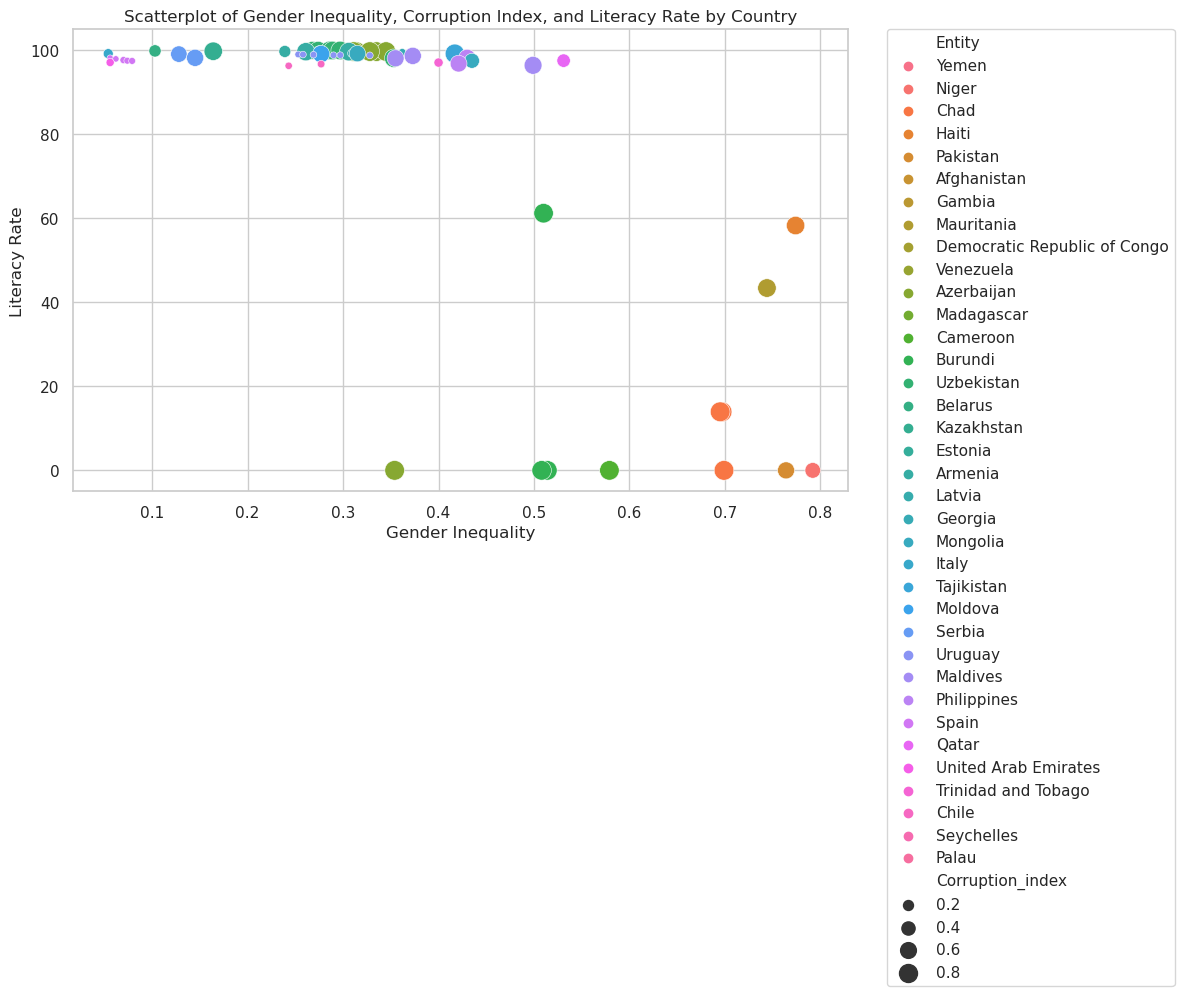

In [445]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_final is your DataFrame containing the required columnsLiteracy rate, adult total (% of people ages 15 and above)
# Assuming Literacy Rate, Mean Corruption Index, Cantril_ladder_score, and Entity are columns in df_final

# Set the style of seaborn
sns.set(style="whitegrid")

# Create the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_20_countries, x='Gender_Inequality_Index', y='Literacy Rate', hue='Entity', size='Corruption_index', sizes=(20, 200))

# Set title and labels
plt.title('Scatterplot of Gender Inequality, Corruption Index, and Literacy Rate by Country')
plt.xlabel('Gender Inequality')
plt.ylabel('Literacy Rate')

# Show the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [446]:
df_final_data.columns

Index(['Entity', 'Code', 'Year',
       'Observation value - Unit of measure: Deaths per 100 live births - Indicator: Under-five mortality rate - Sex: Both sexes - Wealth quintile: All wealth quintiles_x',
       'Mean years of schooling', 'Cereal Production',
       'Observation value - Unit of measure: Deaths per 100 live births - Indicator: Under-five mortality rate - Sex: Both sexes - Wealth quintile: All wealth quintiles_y',
       'Upper_secondary_completion_rate', 'Mean_income_consumption',
       'Deaths_due_to_air_pollution', 'Drug_use_death_rate',
       'Gender_Inequality_Index', 'BCG_immunization', 'HepB3_immunization',
       'Hib3_immunization', 'IPV1_immunization', 'MCV1_immunization',
       'PCV3_immunization', 'Pol3_immunization', 'RCV1_immunization',
       'RotaC_immunization', 'YFV_immunization', 'DTP3_immunization',
       'Cantril_ladder_score', 'HDI', 'Life_expectancy_at_birth', 'GDP_PPP',
       'Patent_applications_per_million', 'Corruption_index',
       'Hig

### Inference: Countries with high corruption have low literacy and high gender inequality
### Countries that have high literacy have low corruption and low gender inequality like: Denmark, Finland and Norway

### Deriving correlations between economic prosperity, gender bias and education

In [448]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the three categories
economic_prosperity_features = ['Mean_income_consumption', 'GDP_PPP', 'Cereal Production', 'Expenditure_estimates']
education_features = ['Literacy Rate', 'Mean years of schooling', 'Upper_secondary_completion_rate',
                     'Patent_applications_per_million', 'Secondary_school_enrollment', 'Tertiary_school_enrollment',
                     'Lower_secondary_completion_rate', 'Researchers_per_million']
gender_bias_features = ['Gender_Inequality_Index', 'Count of Women in Parliament']
quality_of_life = ['Deaths_due_to_air_pollution', 'Drug_use_death_rate', 'BCG_immunization', 'HepB3_immunization',
                   'Hib3_immunization', 'IPV1_immunization', 'MCV1_immunization', 'PCV3_immunization',
                   'Pol3_immunization', 'RCV1_immunization', 'RotaC_immunization', 'YFV_immunization',
                   'DTP3_immunization', 'Cantril_ladder_score', 'HDI', 'Life_expectancy_at_birth', 'Corruption_index',
                   'Lower_secondary_completion_rate', 'Researchers_per_million']

# Calculate correlation matrix for economic prosperity and education
economic_education_corr = df_final_data[economic_prosperity_features + education_features].corr()

# Calculate correlation matrix for education and gender bias
education_gender_corr = df_final_data[education_features + gender_bias_features].corr()

# Calculate correlation matrix for education and quality of life
education_lifequality_corr = df_final_data[gender_bias_features + economic_prosperity_features].corr()

Text(0.5, 1.0, 'Life Quality vs. Education')

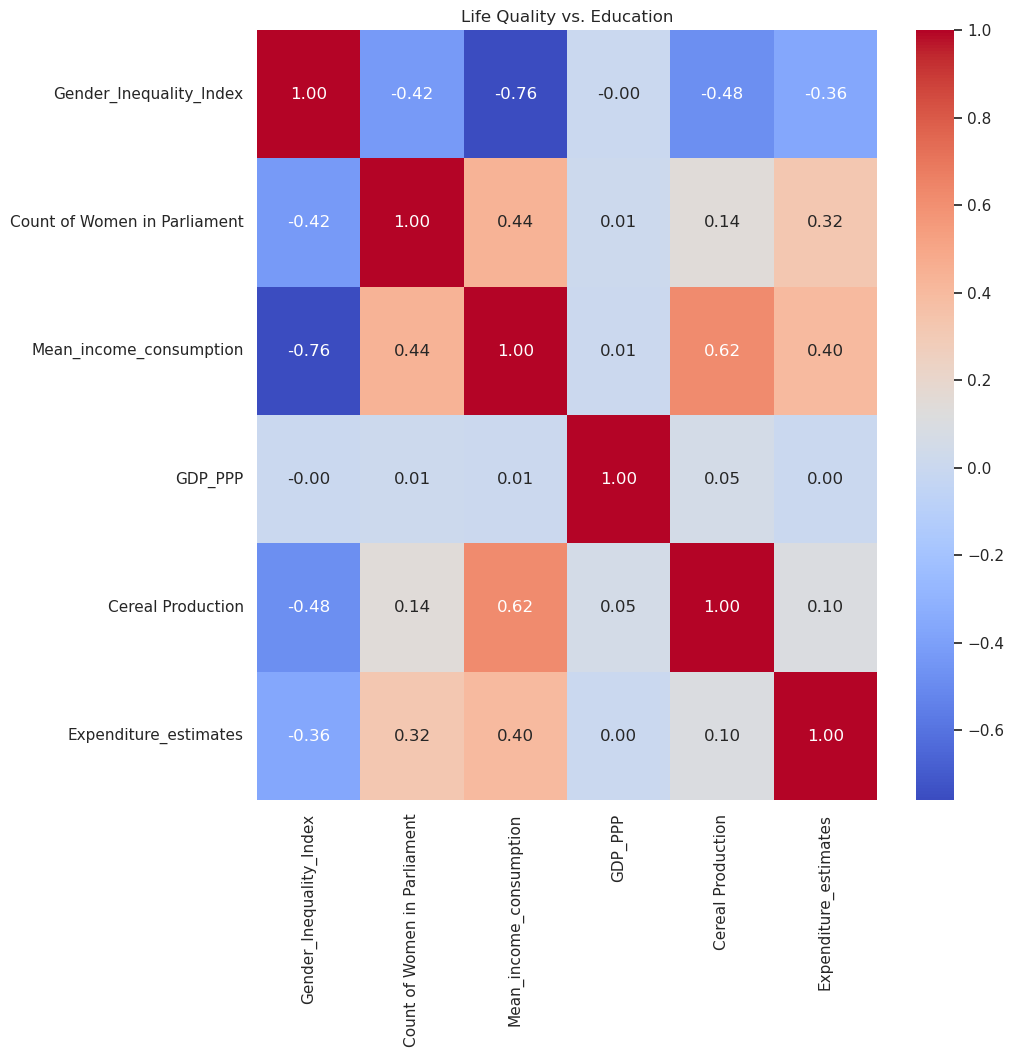

In [452]:
plt.figure(figsize=(10, 10))
sns.heatmap(education_lifequality_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Life Quality vs. Education')

Text(0.5, 1.0, 'Economic Prosperity vs. Education')

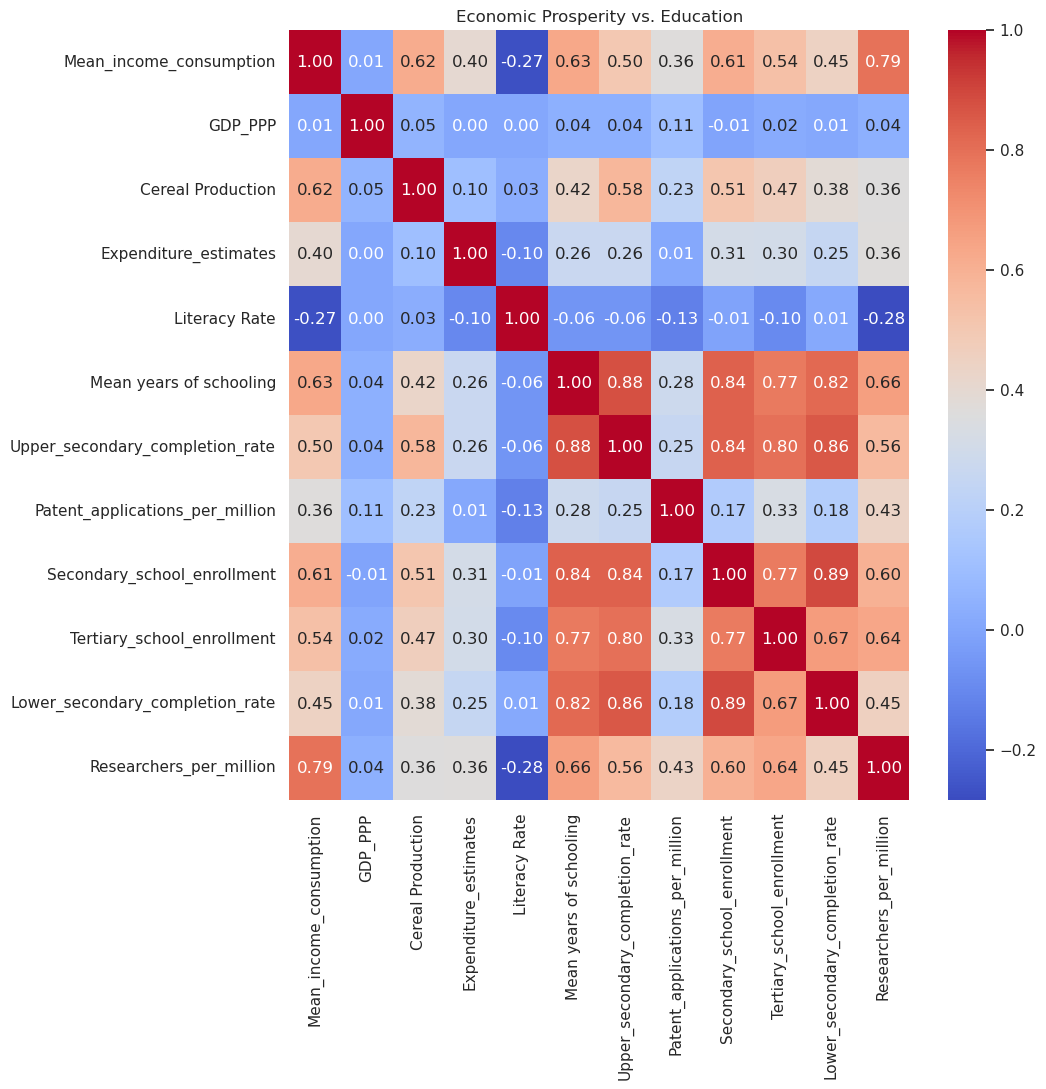

In [449]:
plt.figure(figsize=(10, 10))
sns.heatmap(economic_education_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Economic Prosperity vs. Education')

Text(0.5, 1.0, 'Education vs. Gender Bias')

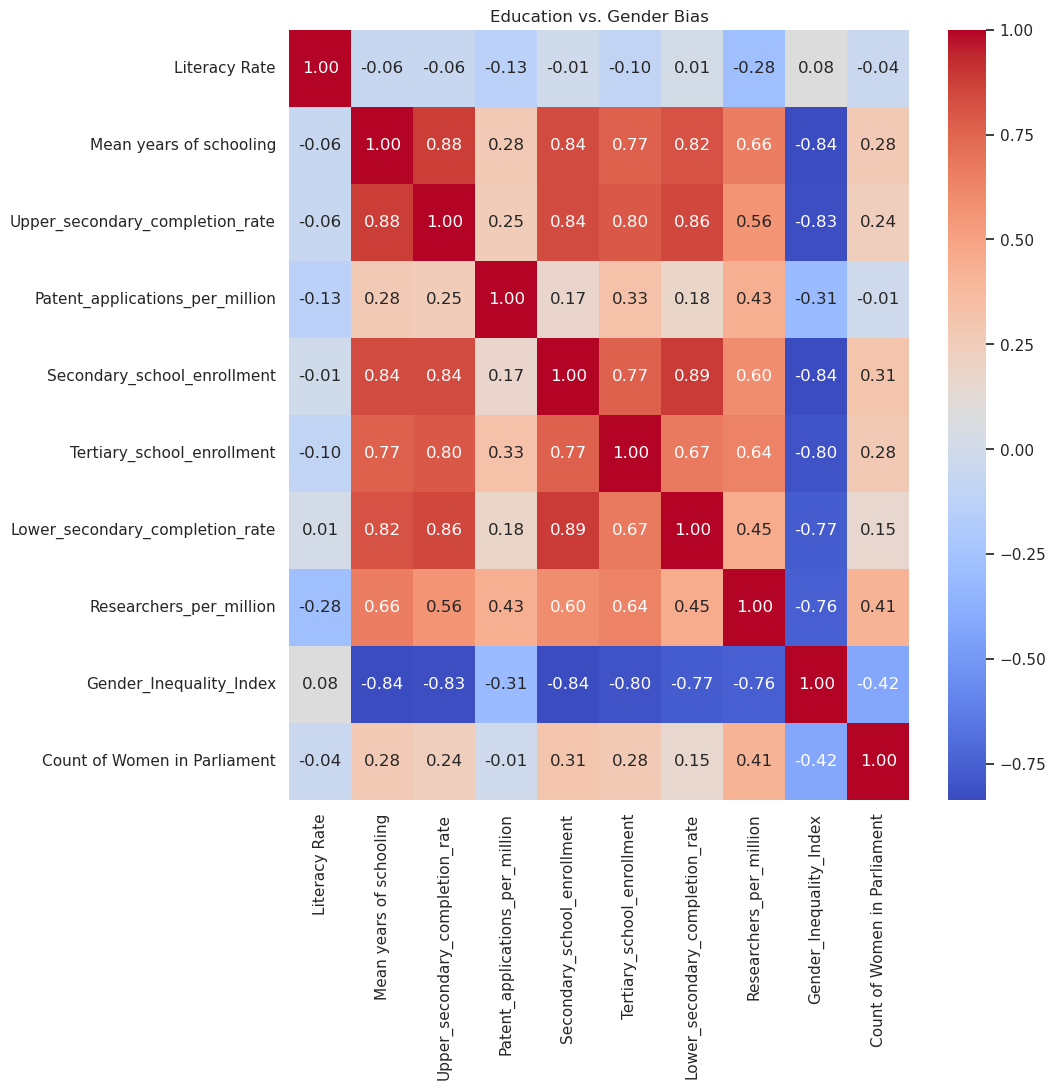

In [450]:
plt.figure(figsize=(10, 10))
sns.heatmap(education_gender_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Education vs. Gender Bias')

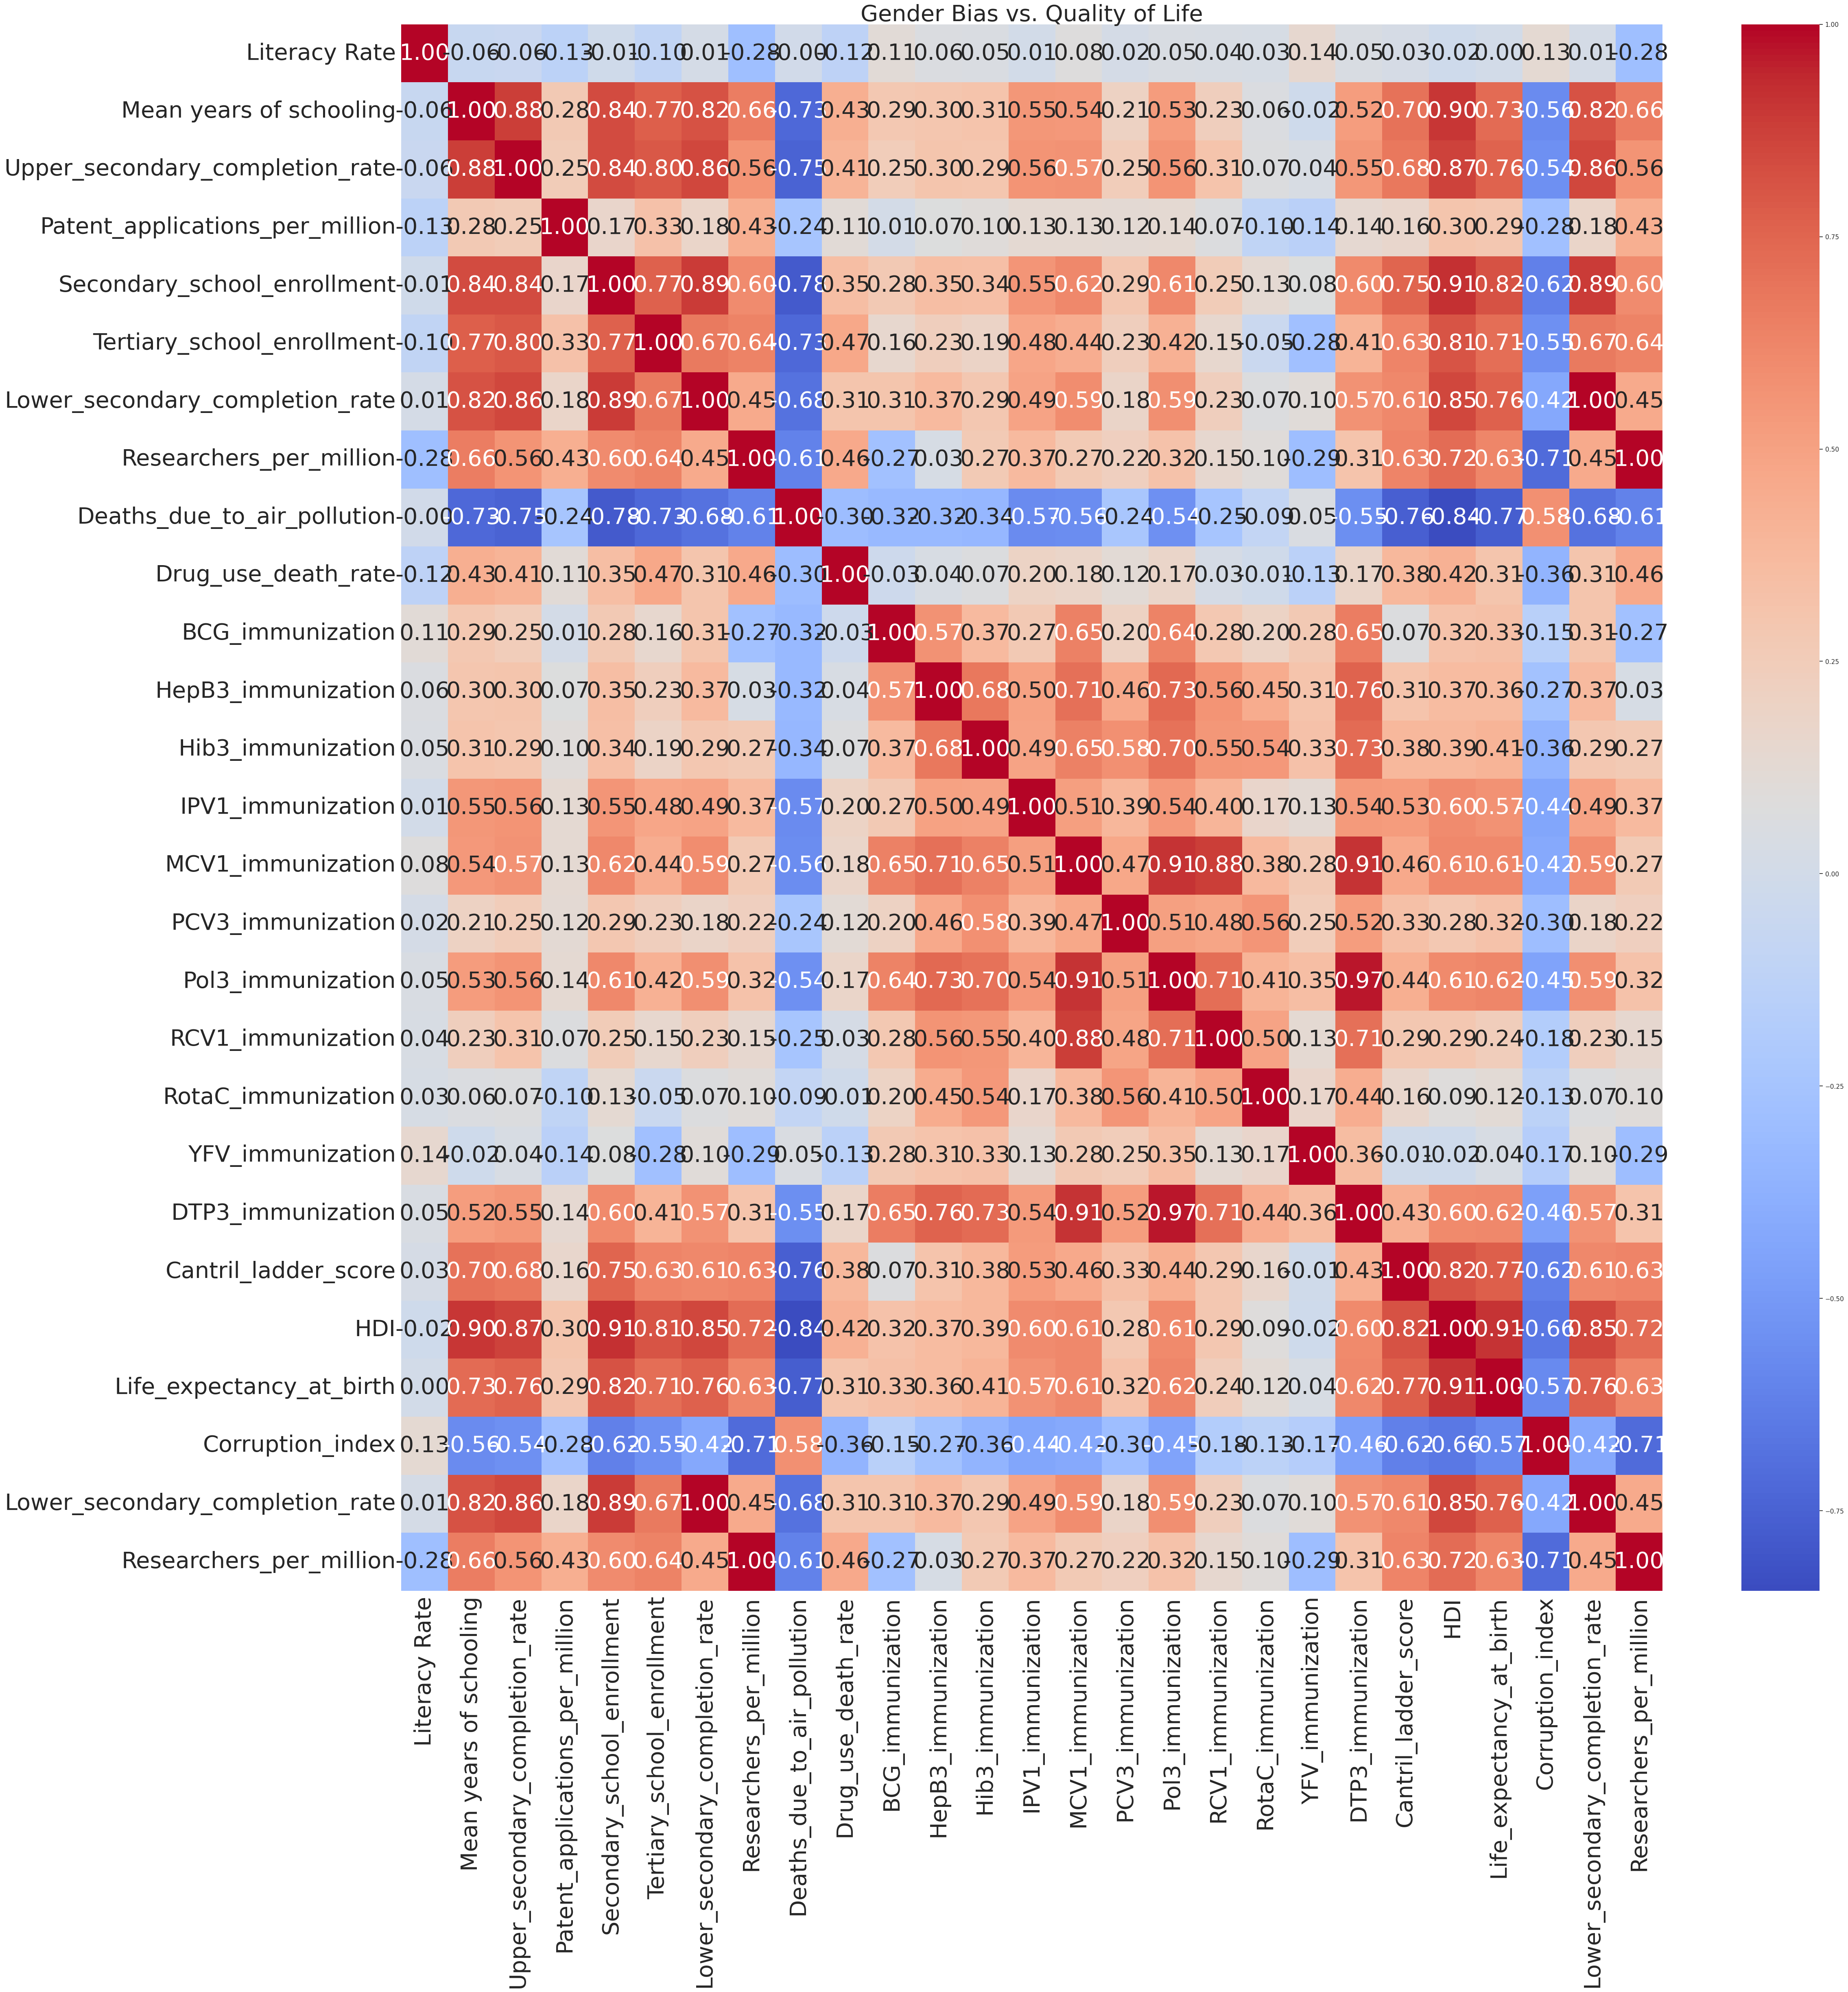

In [451]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(50, 50))
heatmap = sns.heatmap(gender_lifequal_corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 40})

# Increase the size of x and y labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), size=40)
heatmap.set_yticklabels(heatmap.get_yticklabels(), size=40)

plt.title('Gender Bias vs. Quality of Life', fontsize=40)
plt.show()

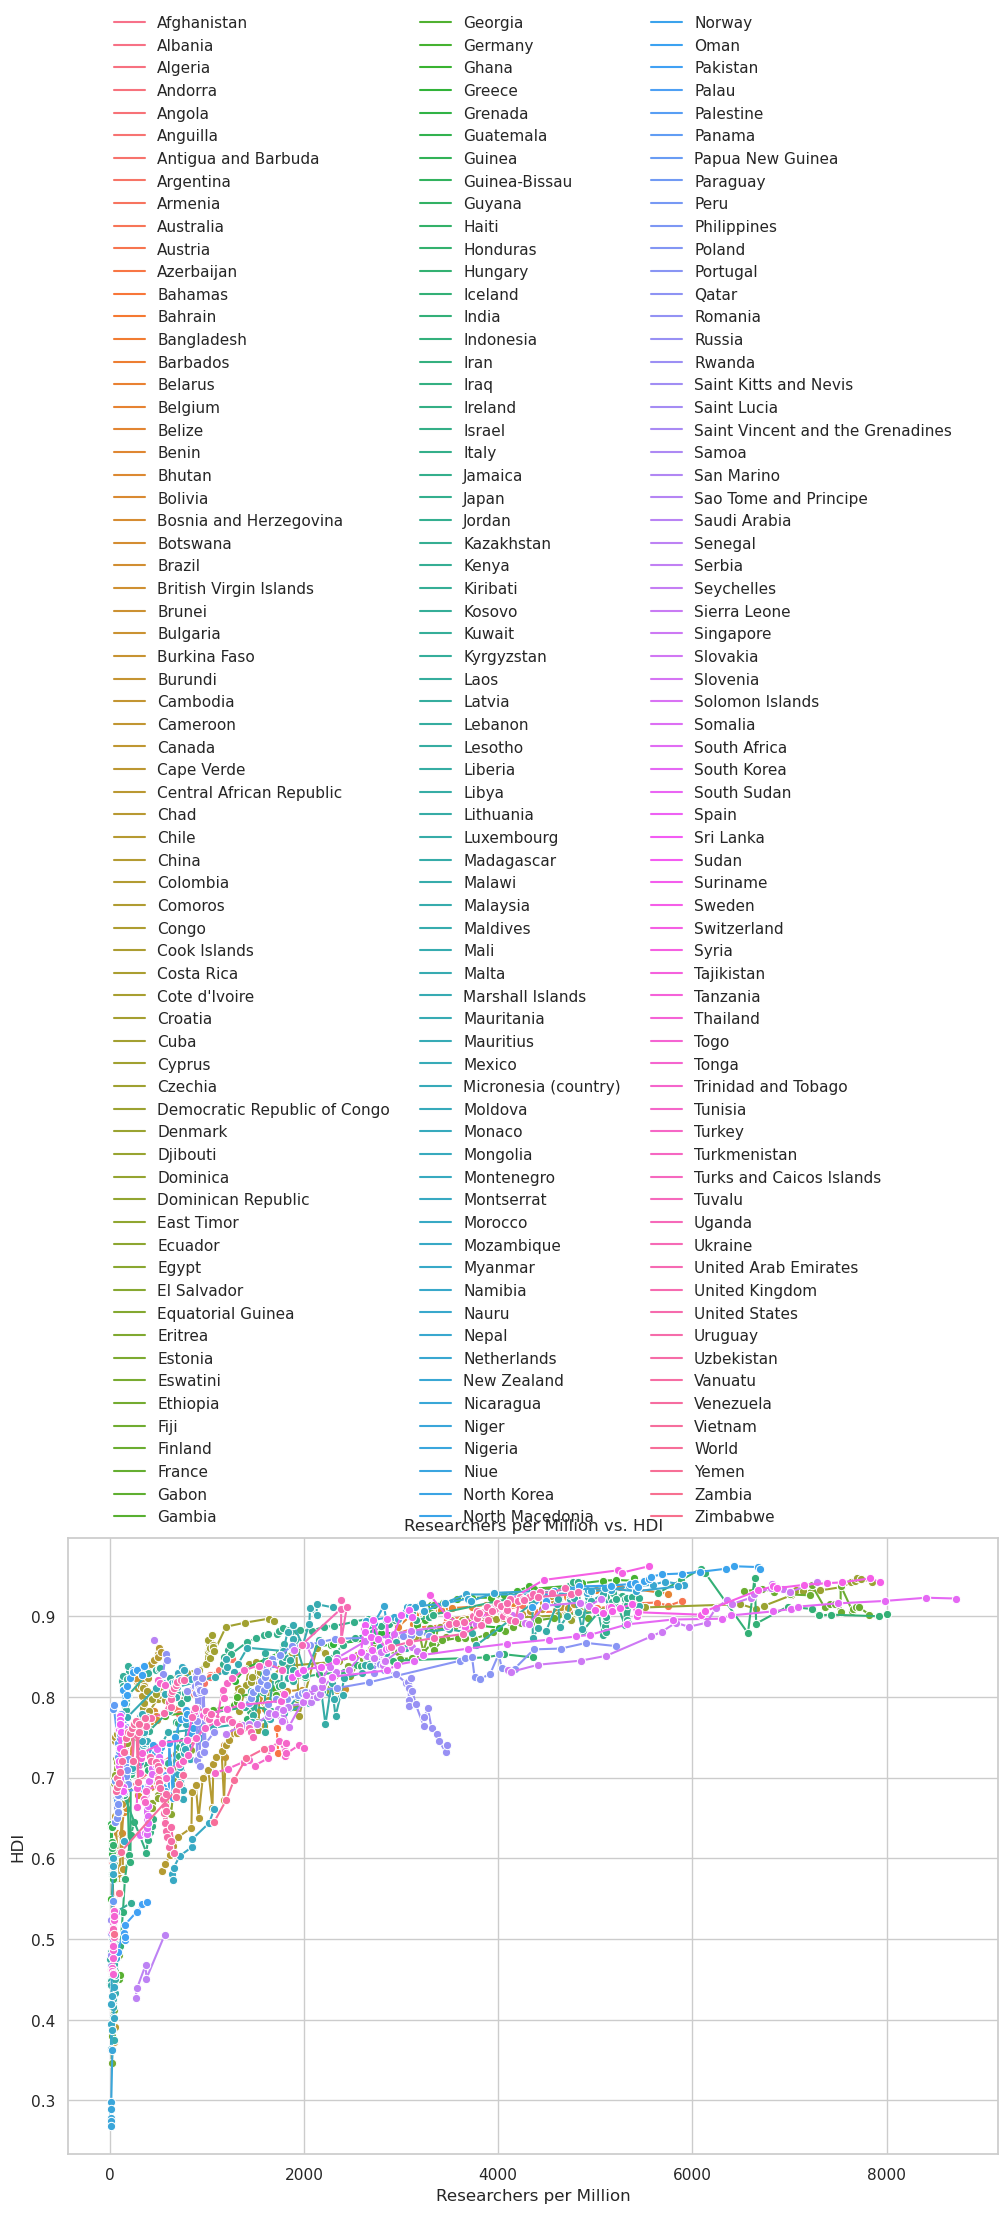

In [408]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
ax = sns.lineplot(data=df_final_data, x='Researchers_per_million', y='HDI', hue='Entity', marker='o')
plt.title('Researchers per Million vs. HDI')
plt.xlabel('Researchers per Million')
plt.ylabel('HDI')
sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, 1), ncol=3, title=None, frameon=False)
plt.grid(True)

# Adding a horizontal label below the chart
#plt.text(0.5, -0.1, "Horizontal Label Below Chart", fontsize=12, ha='center', transform=plt.gca().transAxes)

plt.show()


### K-Means and Data Points

In [453]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


# Load your data
df1 = pd.read_csv('../data/final_data.csv')
df1 = df1[df1['Code']!='OWID_WRL']
df1 = df1[df1['Year']==2020]
df1.dropna(axis=1, how='all', inplace=True)

# Select columns to use in KMeans, ignoring unnecessary columns
columns_to_use = ['HDI']
data_for_clustering = df1[columns_to_use]
data_for_clustering.fillna(data_for_clustering.mean(), inplace=True)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=9572).fit(data_for_clustering)
km_pred = kmeans.predict(data_for_clustering)
df1['clusterId'] = km_pred
df1.loc[df1['clusterId']==0]

/tmp/ipykernel_120109/2366226588.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_clustering.fillna(data_for_clustering.mean(), inplace=True)
/home/radone/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Entity      Code  Year  \
41                             Albania       ALB  2020   
62                             Algeria       DZA  2020   
125                           Anguilla       AIA  2020   
146                Antigua and Barbuda       ATG  2020   
188                            Armenia       ARM  2020   
251                         Azerbaijan       AZE  2020   
314                         Bangladesh       BGD  2020   
335                           Barbados       BRB  2020   
356                            Belarus       BLR  2020   
398                             Belize       BLZ  2020   
440                             Bhutan       BTN  2020   
461                            Bolivia       BOL  2020   
482             Bosnia and Herzegovina       BIH  2020   
503                           Botswana       BWA  2020   
524                             Brazil       BRA  2020   
545             British Virgin Islands       VGB  2020   
587                           Bulgaria       BGR  2020   
713                         Cape Verde       CPV  2020   
797                              China       CHN  2020   
818                           Colombia       COL  2020   
881                       Cook Islands       COK  2020   
965                               Cuba       CUB  2020   
1091                          Dominica       DMA  2020   
1112                Dominican Republic       DOM  2020   
1154                           Ecuador       ECU  2020   
1175                             Egypt       EGY  2020   
1196                       El Salvador       SLV  2020   
1322                              Fiji       FJI  2020   
1385                             Gabon       GAB  2020   
1427                           Georgia       GEO  2020   
1469                             Ghana       GHA  2020   
1511                           Grenada       GRD  2020   
1532                         Guatemala       GTM  2020   
1595                            Guyana       GUY  2020   
1700                             India       IND  2020   
1721                         Indonesia       IDN  2020   
1742                              Iran       IRN  2020   
1763                              Iraq       IRQ  2020   
1847                           Jamaica       JAM  2020   
1889                            Jordan       JOR  2020   
1973                            Kosovo  OWID_KOS  2020   
2015                        Kyrgyzstan       KGZ  2020   
2078                           Lebanon       LBN  2020   
2141                             Libya       LBY  2020   
2246                          Malaysia       MYS  2020   
2267                          Maldives       MDV  2020   
2330                  Marshall Islands       MHL  2020   
2372                         Mauritius       MUS  2020   
2393                            Mexico       MEX  2020   
2435                           Moldova       MDA  2020   
2456                            Monaco       MCO  2020   
2477                          Mongolia       MNG  2020   
2519                        Montserrat       MSR  2020   
2540                           Morocco       MAR  2020   
2603                           Namibia       NAM  2020   
2624                             Nauru       NRU  2020   
2708                         Nicaragua       NIC  2020   
2771                              Niue       NIU  2020   
2792                       North Korea       PRK  2020   
2813                   North Macedonia       MKD  2020   
2897                             Palau       PLW  2020   
2918                         Palestine       PSE  2020   
2939                            Panama       PAN  2020   
2981                          Paraguay       PRY  2020   
3002                              Peru       PER  2020   
3023                       Philippines       PHL  2020   
3170             Saint Kitts and Nevis       KNA  2020   
3191                       Saint Lucia       LCA  2020   
3212  Saint Vincent and the Gr